# Training Setup

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

def train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler,
        valid_data, num_epochs, stats_interval, 
        notebook=True):
    
    # As well as monitoring the error over training also monitor classification
    # accuracy i.e. proportion of most-probable predicted classes being equal to targets
    data_monitors={'acc': lambda y, t: (y.argmax(-1) == t.argmax(-1)).mean()}

    # Use the created objects to initialise a new Optimiser instance.
    optimiser = Optimiser(
        model, error, learning_rule, train_data, scheduler, valid_data, data_monitors, notebook=notebook)

    # Run the optimiser for 5 epochs (full passes through the training set)
    # printing statistics every epoch.
    stats, keys, run_time = optimiser.train(num_epochs=num_epochs, stats_interval=stats_interval)

    # Plot the change in the validation and training set error over training.
    fig_1 = plt.figure(figsize=(8, 4))
    ax_1 = fig_1.add_subplot(111)
    for k in ['error(train)', 'error(valid)']:
        ax_1.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_1.legend(loc=0)
    ax_1.set_xlabel('Epoch number')

    # Plot the change in the validation and training set accuracy over training.
    fig_2 = plt.figure(figsize=(8, 4))
    ax_2 = fig_2.add_subplot(111)
    for k in ['acc(train)', 'acc(valid)']:
        ax_2.plot(np.arange(1, stats.shape[0]) * stats_interval, 
                  stats[1:, keys[k]], label=k)
    ax_2.legend(loc=0)
    ax_2.set_xlabel('Epoch number')
    
    return stats, keys, run_time, fig_1, ax_1, fig_2, ax_2

In [2]:
# The below code will set up the data providers, random number
# generator and logger objects needed for training runs. As
# loading the data from file take a little while you generally
# will probably not want to reload the data providers on
# every training run. If you wish to reset their state you
# should instead use the .reset() method of the data providers.
import numpy as np
import logging
from mlp.data_providers import MNISTDataProvider, EMNISTDataProvider

# Seed a random number generator
seed = 11102018 
rng = np.random.RandomState(seed)
batch_size = 100
# Set up a logger object to print info about the training run to stdout
logger = logging.getLogger()
logger.setLevel(logging.INFO)
logger.handlers = [logging.StreamHandler()]

# Create data provider objects for the MNIST data set
train_data = EMNISTDataProvider('train', batch_size=batch_size, rng=rng)
valid_data = EMNISTDataProvider('valid', batch_size=batch_size, rng=rng)

KeysView(<numpy.lib.npyio.NpzFile object at 0x10b054eb8>)
KeysView(<numpy.lib.npyio.NpzFile object at 0x10b01a390>)


In [3]:
from mlp.layers import AffineLayer, SoftmaxLayer, SigmoidLayer, ReluLayer, LeakyReluLayer
from mlp.errors import CrossEntropySoftmaxError
from mlp.models import MultipleLayerModel
from mlp.initialisers import ConstantInit, GlorotUniformInit
from mlp.learning_rules import AdamLearningRule, GradientDescentLearningRule, RMSPropLearningRule
from mlp.optimisers import Optimiser
from mlp.schedulers import CosineAnnealingWithWarmRestarts

# Train Adam using CosineAnnealing scheduler

Epoch 1: 4.8s to complete
    error(train)=5.33e+00, acc(train)=2.13e-02, error(valid)=5.31e+00, acc(valid)=2.28e-02


Epoch 2: 4.4s to complete
    error(train)=4.38e+00, acc(train)=2.13e-02, error(valid)=4.38e+00, acc(valid)=2.21e-02


Epoch 3: 4.1s to complete
    error(train)=5.22e+00, acc(train)=2.14e-02, error(valid)=5.23e+00, acc(valid)=2.09e-02


Epoch 4: 4.0s to complete
    error(train)=3.87e+00, acc(train)=2.14e-02, error(valid)=3.87e+00, acc(valid)=1.88e-02


Epoch 5: 4.2s to complete
    error(train)=4.04e+00, acc(train)=2.11e-02, error(valid)=4.05e+00, acc(valid)=2.14e-02


Epoch 6: 3.9s to complete
    error(train)=4.19e+00, acc(train)=2.15e-02, error(valid)=4.19e+00, acc(valid)=2.07e-02


Epoch 7: 3.9s to complete
    error(train)=5.03e+00, acc(train)=2.11e-02, error(valid)=5.02e+00, acc(valid)=2.20e-02


Epoch 8: 4.0s to complete
    error(train)=5.58e+00, acc(train)=2.12e-02, error(valid)=5.60e+00, acc(valid)=2.19e-02


Epoch 9: 3.9s to complete
    error(train)=5.56e+00, acc(train)=2.11e-02, error(valid)=5.58e+00, acc(valid)=2.13e-02


Epoch 10: 4.0s to complete
    error(train)=3.85e+00, acc(train)=2.17e-02, error(valid)=3.85e+00, acc(valid)=1.98e-02


Epoch 11: 4.0s to complete
    error(train)=3.86e+00, acc(train)=2.17e-02, error(valid)=3.86e+00, acc(valid)=1.98e-02


Epoch 12: 4.2s to complete
    error(train)=3.89e+00, acc(train)=2.09e-02, error(valid)=3.89e+00, acc(valid)=2.22e-02


Epoch 13: 3.9s to complete
    error(train)=3.90e+00, acc(train)=2.12e-02, error(valid)=3.91e+00, acc(valid)=2.16e-02


Epoch 14: 3.9s to complete
    error(train)=4.03e+00, acc(train)=2.14e-02, error(valid)=4.03e+00, acc(valid)=1.89e-02


Epoch 15: 3.9s to complete
    error(train)=4.03e+00, acc(train)=2.15e-02, error(valid)=4.03e+00, acc(valid)=2.01e-02


Epoch 16: 4.2s to complete
    error(train)=4.16e+00, acc(train)=2.10e-02, error(valid)=4.15e+00, acc(valid)=2.26e-02


Epoch 17: 4.0s to complete
    error(train)=4.37e+00, acc(train)=2.13e-02, error(valid)=4.36e+00, acc(valid)=2.15e-02


Epoch 18: 3.9s to complete
    error(train)=4.30e+00, acc(train)=2.15e-02, error(valid)=4.30e+00, acc(valid)=2.04e-02


Epoch 19: 4.0s to complete
    error(train)=4.60e+00, acc(train)=2.11e-02, error(valid)=4.59e+00, acc(valid)=2.25e-02


Epoch 20: 5.1s to complete
    error(train)=4.47e+00, acc(train)=2.09e-02, error(valid)=4.46e+00, acc(valid)=2.22e-02


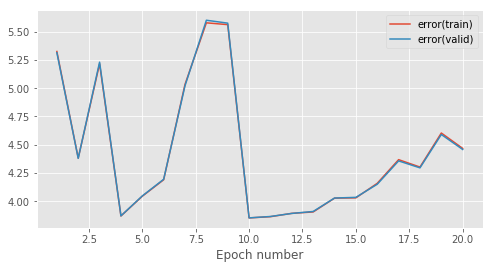

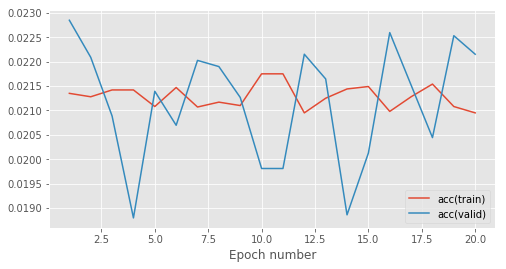

In [4]:
# The model set up code below is provided as a starting point.
# You will probably want to add further code cells for the
# different experiments you run.

min_learning_rates = [0.001, 0.0001]
max_learning_rates = [0.05, 0.01]

for i in range(2):
    
    #setup hyperparameters
    min_learning_rate = min_learning_rates[i]
    max_learning_rate = max_learning_rates[i]
    total_iters_per_period = 25
    max_learning_rate_discount_factor = 0.8
    period_iteration_expansion_factor = 3
    num_epochs = 100

    stats_interval = 1
    input_dim, output_dim, hidden_dim = 784, 47, 100

    weights_init = GlorotUniformInit(rng=rng)
    biases_init = ConstantInit(0.)
    model = MultipleLayerModel([
        AffineLayer(input_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init), 
        ReluLayer(),
        AffineLayer(hidden_dim, hidden_dim, weights_init, biases_init),
        ReluLayer(),
        AffineLayer(hidden_dim, output_dim, weights_init, biases_init)
    ])

    error = CrossEntropySoftmaxError()
    # Use a basic gradient descent learning rule
    learning_rule = AdamLearningRule()

    scheduler = CosineAnnealingWithWarmRestarts(min_learning_rate, max_learning_rate, total_iters_per_period, max_learning_rate_discount_factor,
                     period_iteration_expansion_factor)

    #Remember to use notebook=False when you write a script to be run in a terminal
    stats, keys, run_time, fig_1, ax_1, fig_2, ax_2 = train_model_and_plot_stats(
        model, error, learning_rule, train_data, scheduler, valid_data, num_epochs, stats_interval, notebook=True)

    fig_1.tight_layout()
    fig_1_name = "adam_fig_1_" + str(min_learning_rate) + "-" + str(max_learning_rate) + ".pdf"
    fig_1.savefig(fig_1_name)

    fig_2.tight_layout()
    fig_2_name = "adam_fig_2_" + str(min_learning_rate) + "-" + str(max_learning_rate) + ".pdf"
    fig_2.savefig(fig_2_name)

    print('-' * 80)
    print('learning_rate={0:.2f}-{1:.2f}'
          .format(min_learning_rate, max_learning_rate))
    print('-' * 80)

    plt.show()

    print('    final error(train) = {0:.2e}'.format(stats[-1, keys['error(train)']]))
    print('    final error(valid) = {0:.2e}'.format(stats[-1, keys['error(valid)']]))
    print('    final acc(train)   = {0:.2e}'.format(stats[-1, keys['acc(train)']]))
    print('    final acc(valid)   = {0:.2e}'.format(stats[-1, keys['acc(valid)']]))
    print('    run time per epoch = {0:.2f}'.format(run_time * 1. / num_epochs))